# Proyecto guiado COVID-19

Por Skills.For.Industry
www.skillsforindustry.org

Durante este proyecto guiado analizaremos los datos del Coronavirus alrededor del mundo.


In [ ]:
# paso 1 . importación de librerías 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


En este notebook haremos un proyecto de covid

In [2]:
# cargar los datos

data = pd.read_csv('covid_19_data.csv' , encoding='utf-8')

In [3]:
# observar los datos

data.head(10)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1,0,0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14,0,0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6,0,0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1,0,0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0,0,0
5,6,01/22/2020,Guangdong,Mainland China,1/22/2020 17:00,26,0,0
6,7,01/22/2020,Guangxi,Mainland China,1/22/2020 17:00,2,0,0
7,8,01/22/2020,Guizhou,Mainland China,1/22/2020 17:00,1,0,0
8,9,01/22/2020,Hainan,Mainland China,1/22/2020 17:00,4,0,0
9,10,01/22/2020,Hebei,Mainland China,1/22/2020 17:00,1,0,0


In [4]:
data.tail(10)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
306419,306420,05/29/2021,Yukon,Canada,2021-05-30 4:20:55,84,2,82
306420,306421,05/29/2021,Yunnan,Mainland China,2021-05-30 4:20:55,352,2,331
306421,306422,05/29/2021,Zabaykalsky Krai,Russia,2021-05-30 4:20:55,43126,669,41650
306422,306423,05/29/2021,Zacatecas,Mexico,2021-05-30 4:20:55,30758,2797,0
306423,306424,05/29/2021,Zakarpattia Oblast,Ukraine,2021-05-30 4:20:55,61611,1586,58882
306424,306425,05/29/2021,Zaporizhia Oblast,Ukraine,2021-05-30 4:20:55,102641,2335,95289
306425,306426,05/29/2021,Zeeland,Netherlands,2021-05-30 4:20:55,29147,245,0
306426,306427,05/29/2021,Zhejiang,Mainland China,2021-05-30 4:20:55,1364,1,1324
306427,306428,05/29/2021,Zhytomyr Oblast,Ukraine,2021-05-30 4:20:55,87550,1738,83790
306428,306429,05/29/2021,Zuid-Holland,Netherlands,2021-05-30 4:20:55,391559,4252,0


Limpieza de datos

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306429 entries, 0 to 306428
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   SNo              306429 non-null  int64 
 1   ObservationDate  306429 non-null  object
 2   Province/State   228329 non-null  object
 3   Country/Region   306429 non-null  object
 4   Last Update      306429 non-null  object
 5   Confirmed        306429 non-null  int64 
 6   Deaths           306429 non-null  int64 
 7   Recovered        306429 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 18.7+ MB


###### podemos detectar que 'ObservationDate' y 'Last Update' están en formato Object, necesitamos cambar esto a un DateTime

In [6]:
data=data.astype({"ObservationDate":"Datetime64","Last Update":"Datetime64"})
data.head(10)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,2020-01-22,Anhui,Mainland China,2020-01-22 17:00:00,1,0,0
1,2,2020-01-22,Beijing,Mainland China,2020-01-22 17:00:00,14,0,0
2,3,2020-01-22,Chongqing,Mainland China,2020-01-22 17:00:00,6,0,0
3,4,2020-01-22,Fujian,Mainland China,2020-01-22 17:00:00,1,0,0
4,5,2020-01-22,Gansu,Mainland China,2020-01-22 17:00:00,0,0,0
5,6,2020-01-22,Guangdong,Mainland China,2020-01-22 17:00:00,26,0,0
6,7,2020-01-22,Guangxi,Mainland China,2020-01-22 17:00:00,2,0,0
7,8,2020-01-22,Guizhou,Mainland China,2020-01-22 17:00:00,1,0,0
8,9,2020-01-22,Hainan,Mainland China,2020-01-22 17:00:00,4,0,0
9,10,2020-01-22,Hebei,Mainland China,2020-01-22 17:00:00,1,0,0


Revisa datos nulos. ¿Qué tantos hay?

In [7]:
data.isnull().sum()

SNo                    0
ObservationDate        0
Province/State     78100
Country/Region         0
Last Update            0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306429 entries, 0 to 306428
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   SNo              306429 non-null  int64         
 1   ObservationDate  306429 non-null  datetime64[ns]
 2   Province/State   228329 non-null  object        
 3   Country/Region   306429 non-null  object        
 4   Last Update      306429 non-null  datetime64[ns]
 5   Confirmed        306429 non-null  int64         
 6   Deaths           306429 non-null  int64         
 7   Recovered        306429 non-null  int64         
dtypes: datetime64[ns](2), int64(4), object(2)
memory usage: 18.7+ MB


In [9]:
data.dtypes

SNo                         int64
ObservationDate    datetime64[ns]
Province/State             object
Country/Region             object
Last Update        datetime64[ns]
Confirmed                   int64
Deaths                      int64
Recovered                   int64
dtype: object

* podemos ver que hemos cambiado el formato objeto a un formato de tiempo

Revisa el tamaño del dataset

In [10]:
data.shape

(306429, 8)

Revisa el día de la última observación

In [11]:
data["ObservationDate"].max()
data.loc[306428,"ObservationDate"]

Timestamp('2021-05-29 00:00:00')

continuamos explorando nuestra base de datos. Imprime los datos únicos para la columna de Province/State


In [12]:
data["Province/State"].unique()

array(['Anhui', 'Beijing', 'Chongqing', 'Fujian', 'Gansu', 'Guangdong',
       'Guangxi', 'Guizhou', 'Hainan', 'Hebei', 'Heilongjiang', 'Henan',
       'Hong Kong', 'Hubei', 'Hunan', 'Inner Mongolia', 'Jiangsu',
       'Jiangxi', 'Jilin', 'Liaoning', 'Macau', 'Ningxia', 'Qinghai',
       'Shaanxi', 'Shandong', 'Shanghai', 'Shanxi', 'Sichuan', 'Taiwan',
       'Tianjin', 'Tibet', 'Washington', 'Xinjiang', 'Yunnan', 'Zhejiang',
       nan, 'Unknown', 'Chicago', 'Illinois', 'California', 'Arizona',
       'Ontario', 'New South Wales', 'Victoria', 'British Columbia',
       'Bavaria', 'Queensland', 'Chicago, IL', 'South Australia',
       'Boston, MA', 'Los Angeles, CA', 'Orange, CA', 'Santa Clara, CA',
       'Seattle, WA', 'Tempe, AZ', 'San Benito, CA', 'Toronto, ON',
       'London, ON', 'Madison, WI', 'Cruise Ship',
       'Diamond Princess cruise ship', 'San Diego County, CA',
       'San Antonio, TX', 'Ashland, NE', 'Travis, CA',
       'From Diamond Princess', 'Lackland, TX', 'None'

Imprime el **número** de valores únicos ahora

In [13]:
data['Province/State'].value_counts()

Unknown                         4123
Amazonas                        1109
Diamond Princess cruise ship     924
Grand Princess                   882
Punjab                           708
                                ... 
Harrison County, KY                1
Johnson County, IA                 1
Queens County, NY                  1
Unassigned Location, VT            1
Charlotte County, FL               1
Name: Province/State, Length: 737, dtype: int64

Revisa, de reojo, ¿hay algún país que tenga mal escrito el nombre?

In [14]:
data['Country/Region'].unique()

array(['Mainland China', 'Hong Kong', 'Macau', 'Taiwan', 'US', 'Japan',
       'Thailand', 'South Korea', 'China', 'Kiribati', 'Singapore',
       'Philippines', 'Malaysia', 'Vietnam', 'Australia', 'Mexico',
       'Brazil', 'Colombia', 'France', 'Nepal', 'Canada', 'Cambodia',
       'Sri Lanka', 'Ivory Coast', 'Germany', 'Finland',
       'United Arab Emirates', 'India', 'Italy', 'UK', 'Russia', 'Sweden',
       'Spain', 'Belgium', 'Others', 'Egypt', 'Iran', 'Israel', 'Lebanon',
       'Iraq', 'Oman', 'Afghanistan', 'Bahrain', 'Kuwait', 'Austria',
       'Algeria', 'Croatia', 'Switzerland', 'Pakistan', 'Georgia',
       'Greece', 'North Macedonia', 'Norway', 'Romania', 'Denmark',
       'Estonia', 'Netherlands', 'San Marino', 'Azerbaijan', 'Belarus',
       'Iceland', 'Lithuania', 'New Zealand', 'Nigeria', 'North Ireland',
       'Ireland', 'Luxembourg', 'Monaco', 'Qatar', 'Ecuador',
       'Czech Republic', 'Armenia', 'Dominican Republic', 'Indonesia',
       'Portugal', 'Andorra', '

In [15]:
paisregion = data.groupby(["Country/Region", "Province/State"]).max()
mexcov=paisregion.loc["Mexico"].head(32)
mexcov

,SNo,ObservationDate,Last Update,Confirmed,Deaths,Recovered
Province/State,,,,,,
Aguascalientes,305840,2021-05-29,2021-05-30 04:20:55,26501,2418,8450
Baja California,305886,2021-05-29,2021-05-30 04:20:55,49091,8241,18915
Baja California Sur,305887,2021-05-29,2021-05-30 04:20:55,32041,1437,11901
Campeche,305917,2021-05-29,2021-05-30 04:20:55,10174,1227,5639
Chiapas,305939,2021-05-29,2021-05-30 04:20:55,11413,1573,6730
Chihuahua,305941,2021-05-29,2021-05-30 04:20:55,55547,6966,17317
Ciudad de Mexico,305946,2021-05-29,2021-05-30 04:20:55,657832,33198,142328
Coahuila,305947,2021-05-29,2021-05-30 04:20:55,68802,6262,30938
Colima,305948,2021-05-29,2021-05-30 04:20:55,11894,1196,5791


## creación de DataFrames 

Crea un dataframe que contenga únicamente los datos de China llamado "China" y uno para México

In [16]:
chinacov=paisregion.loc["Mainland China"]
chinacov

,SNo,ObservationDate,Last Update,Confirmed,Deaths,Recovered
Province/State,,,,,,
Anhui,305859,2021-05-29,2021-05-30 04:20:55,1004,6,994
Beijing,305893,2021-05-29,2021-05-30 04:20:55,1059,9,1046
Chongqing,305943,2021-05-29,2021-05-30 04:20:55,598,6,586
Fujian,305985,2021-05-29,2021-05-30 04:20:55,620,1,588
Gansu,305990,2021-05-29,2021-05-30 04:20:55,194,2,192
Guangdong,306008,2021-05-29,2021-05-30 04:20:55,2432,8,2381
Guangxi,306009,2021-05-29,2021-05-30 04:20:55,275,2,268
Guizhou,306012,2021-05-29,2021-05-30 04:20:55,147,2,145
Hainan,306015,2021-05-29,2021-05-30 04:20:55,188,6,181


## Limpieza de Datos nulos y NaN

Revisa el número de datos nulos para México e imprime el porcentaje de datos nulos por columna

In [17]:
mexcov.isnull().sum()

SNo                0
ObservationDate    0
Last Update        0
Confirmed          0
Deaths             0
Recovered          0
dtype: int64

Después, llena los datos nulos de la columna de estado con los datos del país. Por ejemplo, si no tiene el estado, en lugar de decir "Morelia" llenalo con "México". ¿Es esta una buena opción? ¿Qué podrías hacer diferente? 

Hint: utiliza data[""].fillna(data[""], inplace)

In [18]:
#No,resulta una mala idea

Ahora ordena los valores por la última obervación, luego por país, y luego por estado

In [19]:
#ordenamos los valores
#ordd=data.groupby(["Last Update","Country/Region","Province/State"]).max()
ordd=data.sort_values(["Last Update","Country/Region","Province/State"])
ordd.head(50)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
38,39,2020-01-22,Unknown,China,2020-01-22 17:00:00,0,0,0
12,13,2020-01-22,Hong Kong,Hong Kong,2020-01-22 17:00:00,0,0,0
35,36,2020-01-22,NaN,Japan,2020-01-22 17:00:00,2,0,0
39,40,2020-01-22,NaN,Kiribati,2020-01-22 17:00:00,0,0,0
20,21,2020-01-22,Macau,Macau,2020-01-22 17:00:00,1,0,0
0,1,2020-01-22,Anhui,Mainland China,2020-01-22 17:00:00,1,0,0
1,2,2020-01-22,Beijing,Mainland China,2020-01-22 17:00:00,14,0,0
2,3,2020-01-22,Chongqing,Mainland China,2020-01-22 17:00:00,6,0,0
3,4,2020-01-22,Fujian,Mainland China,2020-01-22 17:00:00,1,0,0
4,5,2020-01-22,Gansu,Mainland China,2020-01-22 17:00:00,0,0,0


Crea una nueva columna llamada "first_date", en donde se aplique **por país** el primer día en el que se empezaron a tomar registros. Luego, crea una columna llamada "days", en donde se tenga la diferencia de días que han pasado desde que se comenzó y hasta el día del último registro. ¿Cuántos días han pasado desde la última observación y la primera observación por país?

In [20]:
#ordd=data.groupby(["Last Update","Country/Region","Province/State"]).max()
data["first_date"]=data["ObservationDate"].min()
data["days"]=data["Last Update"]-data["first_date"]
data.head(50)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,first_date,days
0,1,2020-01-22,Anhui,Mainland China,2020-01-22 17:00:00,1,0,0,2020-01-22,0 days 17:00:00
1,2,2020-01-22,Beijing,Mainland China,2020-01-22 17:00:00,14,0,0,2020-01-22,0 days 17:00:00
2,3,2020-01-22,Chongqing,Mainland China,2020-01-22 17:00:00,6,0,0,2020-01-22,0 days 17:00:00
3,4,2020-01-22,Fujian,Mainland China,2020-01-22 17:00:00,1,0,0,2020-01-22,0 days 17:00:00
4,5,2020-01-22,Gansu,Mainland China,2020-01-22 17:00:00,0,0,0,2020-01-22,0 days 17:00:00
5,6,2020-01-22,Guangdong,Mainland China,2020-01-22 17:00:00,26,0,0,2020-01-22,0 days 17:00:00
6,7,2020-01-22,Guangxi,Mainland China,2020-01-22 17:00:00,2,0,0,2020-01-22,0 days 17:00:00
7,8,2020-01-22,Guizhou,Mainland China,2020-01-22 17:00:00,1,0,0,2020-01-22,0 days 17:00:00
8,9,2020-01-22,Hainan,Mainland China,2020-01-22 17:00:00,4,0,0,2020-01-22,0 days 17:00:00
9,10,2020-01-22,Hebei,Mainland China,2020-01-22 17:00:00,1,0,0,2020-01-22,0 days 17:00:00


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306429 entries, 0 to 306428
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype          
---  ------           --------------   -----          
 0   SNo              306429 non-null  int64          
 1   ObservationDate  306429 non-null  datetime64[ns] 
 2   Province/State   228329 non-null  object         
 3   Country/Region   306429 non-null  object         
 4   Last Update      306429 non-null  datetime64[ns] 
 5   Confirmed        306429 non-null  int64          
 6   Deaths           306429 non-null  int64          
 7   Recovered        306429 non-null  int64          
 8   first_date       306429 non-null  datetime64[ns] 
 9   days             306429 non-null  timedelta64[ns]
dtypes: datetime64[ns](3), int64(4), object(2), timedelta64[ns](1)
memory usage: 23.4+ MB


Revisa. ¿Es esta nueva columna tiene un tipo de dato correcto?

In [22]:
#shi

## última actualización de la base de datos

Selecciona e imprime el número de casos mundiales **totales** que se han registrado hasta la fecha. Imprime:
- Total de casos confirmados
- Total de muertes
- Total de gente recuperada
- Death rate (definela como la muertes totales / confirmados)

In [23]:
print("Total de casos confirmados",ordd["Confirmed"].sum())
print("Total de muertes",ordd["Deaths"].sum())
print("Total de gente recuperada",ordd["Recovered"].sum())
print("Death rate",ordd["Deaths"].sum()/ordd["Confirmed"].sum()*100,"%")

Total de casos confirmados 26252051758
Total de muertes 624013017
Total de gente recuperada 15450237912
Death rate 2.377006653622186 %


Ahora realiza la misma métrica, pero agrupando por países. ¿Cuál es el país con mayor número de confirmados? Luego, ordena los registros por el número de casos confirmados

In [24]:
ordd=data.groupby(["Confirmed","Country/Region","Province/State"]).max()
ordd.head(50)

SNo  \
Confirmed Country/Region Province/State                                         
-302844   Colombia       Unknown                                       147525   
 0        Australia      Diamond Princess cruise ship                    7723   
                         External territories                            7926   
                         From Diamond Princess                           4602   
                         Jervis Bay Territory                            7957   
                         Northern Territory                              4603   
          Brazil         Unknown                                        37642   
          Canada         Diamond Princess cruise ship                  305962   
                         Nunavut                                       149618   
                         Recovered                                      24753   
          Chile          Unknown                                        65397   
          China          Unknown                                         4608   
          Colombia       Unknown                                       306365   
          France         French Guiana                                   7724   
                         Guadeloupe                                      7725   
                         Mayotte                                         7726   
                         Reunion                                         7727   
          Hong Kong      Hong Kong                                         13   
          India          Lakshadweep                                   206653   
                         Unknown                                       306367   
          Iraq           None                                            2259   
          Japan          Iwate                                          74770   
          Mainland China Gansu                                           5247   
                         Hebei                                           5248   
                         Heilongjiang                                      11   
                         Inner Mongolia                                    56   
                         Jilin                                             19   
                         Qinghai                                          121   
                         Shaanxi                                           24   
                         Tibet                                             71   
                         Unknown                                       306369   
                         Xinjiang                                          33   
          Mexico         Unknown                                       306370   
          Peru           Unknown                                       306372   
          Spain          Unknown                                       306373   
          UK             Saint Helena, Ascension and Tristan da Cunha  104850   
                         Unknown                                       306374   
          US             Alaska                                          5249   
                         American Samoa                                 10384   
                         Arkansas                                        4804   
                         Delaware                                        4805   
                         Idaho                                           5250   
                         Lackland, TX (From Diamond Princess)            4604   
                         Maine                                           5251   
                         Michigan                                        4808   
                         Mississippi                                     5029   
                         Montana                                         4810   
                         Montgomery County, TX                           4605   
                        

## gráficas

Crea una función que reciba de parámetros dos cosas: una columna, y el título y te genera una **gráfica de barras** en donde te muestre el top 15 de países de ésa columna con los datos **a la fecha**. 

Por ejemplo, sería plot_new("Confirmados", "este es mi título")
Y esto nos traería una gráfica de barras con el top 15 de países que tengan mayor número de confirmados **a la fecha**

In [25]:
ndata=data[pd.notnull(data["Province/State"])]
ndata=ndata[ndata["Province/State"] != "Unknown"]
ndata["Province/State"].value_counts()

Amazonas                        1109
Diamond Princess cruise ship     924
Grand Princess                   882
Punjab                           708
Limburg                          516
                                ... 
Harrison County, KY                1
Johnson County, IA                 1
Queens County, NY                  1
Unassigned Location, VT            1
Charlotte County, FL               1
Name: Province/State, Length: 736, dtype: int64

In [26]:
ndata=ndata.groupby("Country/Region").sum().reset_index()

In [27]:
ndata.sort_values(by='Confirmed', ascending=False).head(15)

,Country/Region,SNo,Confirmed,Deaths,Recovered
29,US,3633520104,6049145667,123303762,503370956
11,India,2186533129,3220856672,44256013,2898258094
3,Brazil,1660579643,2649295416,72339029,2308312772
24,Russia,5075673816,921150045,18271229,788327482
28,UK,930549067,768244985,27316216,2323781
25,Spain,1170578652,640132000,18124340,56220169
14,Italy,1295018709,627754296,24852224,485154352
9,Germany,986452028,515821772,13150042,449308780
6,Colombia,2020906810,515081920,13958658,469436209
19,Mexico,1968170319,459557279,42918161,72951374


In [28]:
def fbar_chart(columnas,titulo):
    pai15=ndata.sort_values(by=columnas, ascending=False).head(15)
    pai15.plot(kind="bar", x="Country/Region", y=columnas)
    plt.title(titulo)
    plt.xlabel("Country")
    plt.ylabel(columnas)
    plt.show()

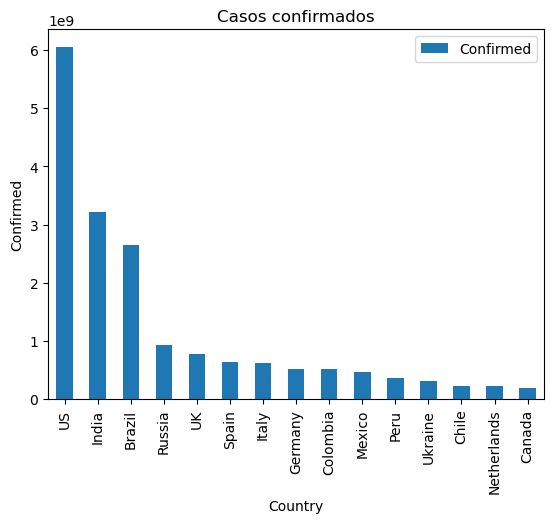

In [29]:
fbar_chart('Confirmed',"Casos confirmados")

Después revisa el siguiente caso

Ahora revisa para la columna de "Deaths"

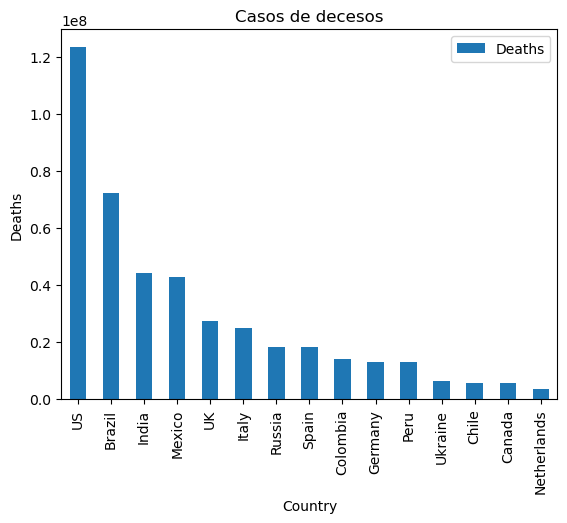

In [30]:
fbar_chart('Deaths',"Casos de decesos")

In [31]:
# al solo cambiar los parametros obtenemos una nueva grafica
#plot_new('Deaths','Death cases top 15 countries')


Y activos

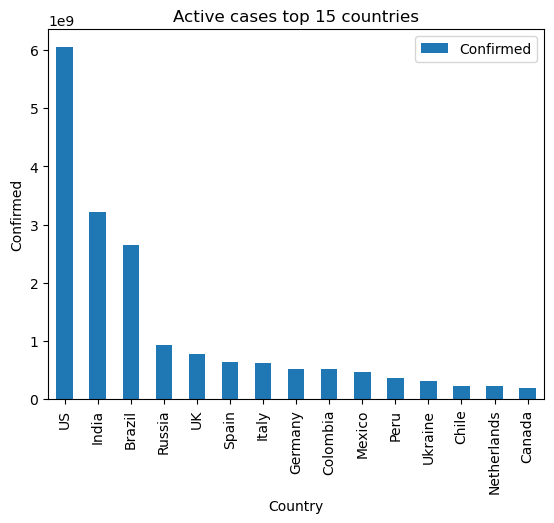

In [32]:
fbar_chart("Confirmed",'Active cases top 15 countries')


Modifica tu función anterior de tal forma que le puedas añadir un nuevo parámetro llamado "rank". Si este es "top", te mostrará el top 15 países para la columna que hayas seleccionado. Si este es "bottom", te mostrará los 15 más bajos. Tmabién filtra mejor tu selección para únicamente mostrar a países que tengan 10 o más muertes. Y después muestra los países con el death rate más alto y más bajo

In [43]:
def fbar_chart(columnas,titulo,rank="top"):
    
    ndata1=ndata[ndata["Deaths"] >= 10]
    ndata1["dr"]=ndata1["Deaths"]/ndata1["Confirmed"]
    pai=ndata1.sort_values(by="dr", ascending=False)
    pai15max=ndata1.sort_values(by="dr", ascending=False).head(1)
    pai15min=ndata1.sort_values(by="dr", ascending=False).tail(1)
    
    if(rank=="top"):
        pai15=ndata1.sort_values(by=columnas, ascending=False).head(15)
           
        
    elif(rank=="bottom"):
        pai15=ndata1.sort_values(by=columnas, ascending=False).tail(15)
    else:
        return "Elige top o bottom"
        
    pai15.plot(kind="bar", x="Country/Region", y=columnas)
    plt.title(titulo)
    plt.xlabel("Country")
    plt.ylabel(columnas)
    plt.show()
    
    print(pai15max["Country/Region"])
    print(pai15min["Country/Region"])
   
   

Crea un subplot de 2x2 en donde se muestre el número de casos confirmads, fallecidos, casos activos y death rate a través del tiempo de forma global a través del tiempo

C:\Users\luisp\AppData\Local\Temp\ipykernel_1208\1578229201.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndata1["dr"]=ndata1["Deaths"]/ndata1["Confirmed"]


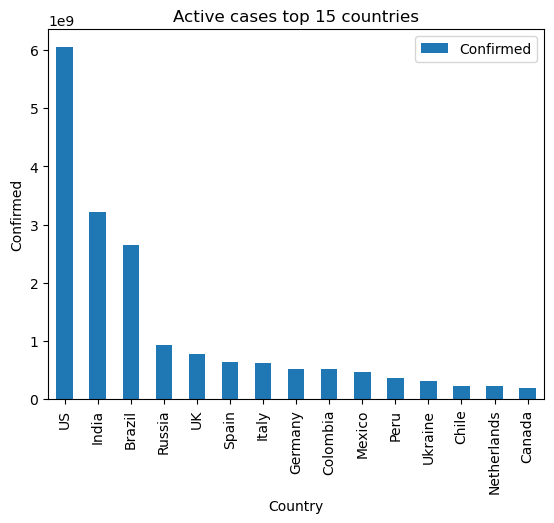

19    Mexico
Name: Country/Region, dtype: object
7    Denmark
Name: Country/Region, dtype: object


In [34]:
fbar_chart("Confirmed",'Active cases top 15 countries',"top")

Modifica el código anterior de tal forma que lo puedas hacer con el país que quieras

C:\Users\luisp\AppData\Local\Temp\ipykernel_1208\3859858447.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndata1["dr"]=ndata1["Deaths"]/ndata1["Confirmed"]


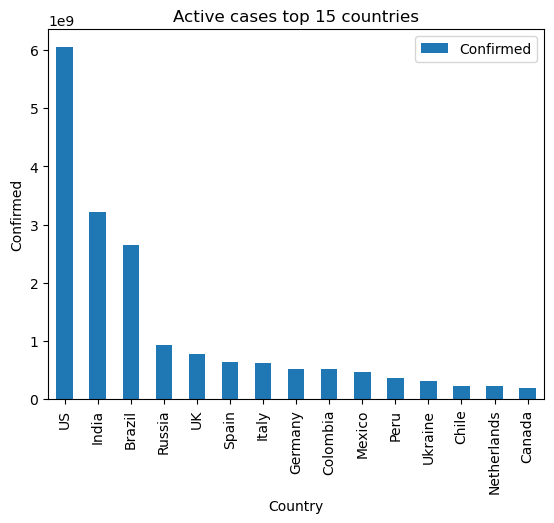

19    Mexico
Name: Country/Region, dtype: object
7    Denmark
Name: Country/Region, dtype: object


In [45]:
fbar_chart("Confirmed",'Active cases top 15 countries',"top")

Imprime para mainland china, méxico, Chile y Perú

## comparación entre paises

Crea una comparación entre países. Como si fuera la gráfica anterior, pero grafica la evolución de casos confirmados para cada país y en el eje **x no tengas la fecha**, sino el número de días que han pasado. ¿Qué podrías concluir de utilizar el número de días a utilizar la fecha?

In [96]:
#España vs México
dataMEX=data[data["Country/Region"]=="Mexico"].sort_values(by="days", ascending=True)
dataMEX=dataMEX[["Confirmed","days"]]
dataMEX['days'] = dataMEX['days'].dt.days
grpdataMEX=dataMEX.groupby("days")["Confirmed"].sum()
grpdataMEX=grpdataMEX.reset_index()
grpdataMEX=grpdataMEX[grpdataMEX["Confirmed"]<500000]

dataESP=data[data["Country/Region"]=="Spain"].sort_values(by="days", ascending=True)
dataESP=dataESP[["Confirmed","days"]]
dataESP['days'] = dataESP['days'].dt.days
grpdataESP=dataESP.groupby("days")["Confirmed"].sum()
grpdataESP=grpdataESP.reset_index()
grpdataESP=grpdataESP[grpdataESP["Confirmed"]<500000]
grpdataMEX

,days,Confirmed
0,1,0
1,37,1
2,38,4
3,39,10
4,41,15
5,44,12
6,46,2823
7,48,7
8,49,20
9,50,12


<function matplotlib.pyplot.show(close=None, block=None)>

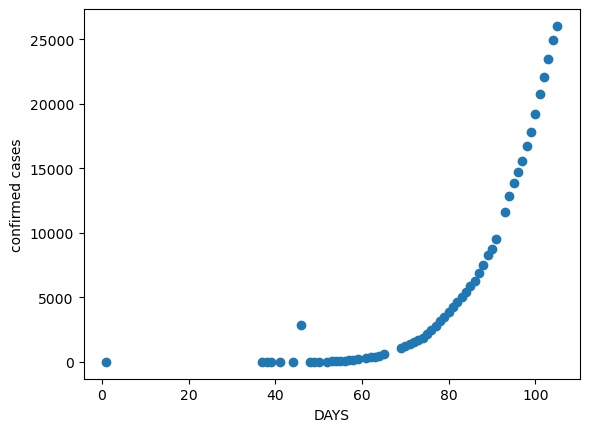

In [88]:
plt.scatter(grpdataMEX["days"],grpdataMEX["Confirmed"])
plt.xlabel("DAYS")
plt.ylabel("confirmed cases")
plt.show

In [ ]:
plt.scatter(grpdataMEX["days"],grpdataMEX["Confirmed"],label="MEX")
plt.scatter(grpdataESP["days"],grpdataESP["Confirmed"],label="ESP")
plt.xlabel("DAYS")
plt.ylabel("confirmed cases")
plt.legend()
plt.show

Modifica tu código anterior para mostrar la misma gráfica, pero selecciona únicamente los países que están en el top10 de fallecidos **a la fecha**

Realiza lo mismo, pero ahora con los países que entraron primero a la pandemia.

Hint: revisa cuáles son los primeros 10 países en entrar y utiliza isin() en la columna de país

In [ ]:
#Hazlo aquí

Muestra el top 15 de países con la mayor death rate

In [ ]:
#Hazlo aquí

Crea un mapa interactivo con el número de casos actuales confirmados utilizando scatter_geo. Para esto necesitarás pegar la columna de código de 3 números por país por ejemplo, Mexico = MEX. Canada = CAN, etc. Haz que los tamaños de los puntitos sean de acuerdo al número de casos confirmados

## mapa 

In [ ]:
datamap=data.sort_values(by="days", ascending=True)
datamap=datamap[["Confirmed","days","Country/Region"]]
datamap['days'] = datamap['days'].dt.days
grpdatamap=datamap.groupby("days")["Confirmed"].sum()
grpdatamap=grpdatamap.reset_index()
grpdatamap

In [ ]:
def get_alpha_3(name):
    try:
       return pycountry.countries.get(name=location).alpha_3
    except:
       return None
    
datamap["code"]= datamap["Country/Region"].apply(lambda x: get_alpha_3(x))